 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_data = Path("whale_returns.csv")
whale = pd.read_csv(whale_data)
whale.sort_index()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [4]:
# Count nulls
whale.isnull().sum(True).sum()

4

In [5]:
# I did this index setting for all three dataframes, because I had to in order to solve for the S&P500 returns and needed to keep everything in the same format.
whale.set_index(pd.to_datetime(whale['Date'], infer_datetime_format=True), inplace=True)
whale.drop(columns=['Date'], inplace = True)

In [6]:
# Drop nulls
whale = whale.dropna()
whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns
algo_data = Path("algo_returns.csv")
algo = pd.read_csv(algo_data)
algo.sort_index()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [9]:
# Count nulls
algo.isnull().sum(True).sum()

6

In [10]:
algo.set_index(pd.to_datetime(algo['Date'], infer_datetime_format=True), inplace=True)
algo.drop(columns=['Date'], inplace = True)

In [11]:
# Drop nulls
algo = algo.dropna()
algo.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500_data = Path("sp500_history.csv")
sp500 = pd.read_csv(sp500_data)
sp500.sort_index()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06
...,...,...
1644,5-Oct-12,$1460.93
1645,4-Oct-12,$1461.40
1646,3-Oct-12,$1450.99
1647,2-Oct-12,$1445.75


In [13]:
# Check Data Types
sp500.dtypes

Date     object
Close    object
dtype: object

In [14]:
# I was getting an error and I thought it was because of the $ symbol so I got rid of it.
sp500['Close'] = sp500['Close'].replace({'\$':''}, regex = True)

In [15]:
sp500.set_index(pd.to_datetime(sp500['Date'], infer_datetime_format=True), inplace=True)
sp500.drop(columns=['Date'], inplace = True)
sp500.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [16]:
# Fix the Data Types
sp500['Close'] = pd.to_numeric(sp500['Close'])

In [17]:
# Calculate Daily Returns
daily_returns = sp500.pct_change()
daily_returns

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [18]:
# Drop nulls
daily_returns = daily_returns.dropna()

In [19]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns.columns = ['SP500']
daily_returns


,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df = pd.concat([whale, algo, daily_returns], axis="columns", join="inner")
df.columns = ['SOROS FUND MANAGEMENT LLC', 'PAULSON', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'SP500']
df
# Had to rename Paulson because when I was calling it in the later cells, it was not registering as it is obviously case-sensative

,SOROS FUND MANAGEMENT LLC,PAULSON,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

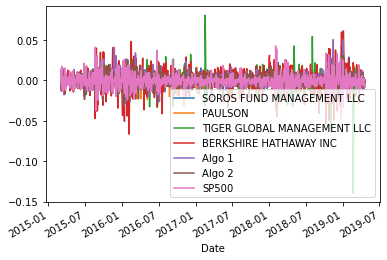

In [21]:
# Plot daily returns of all portfolios
df.plot()


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

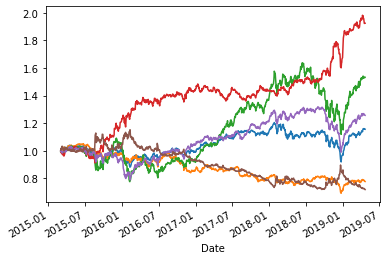

In [22]:
# Calculate cumulative returns of all portfolios
soros_cumulative_returns = (1 + df['SOROS FUND MANAGEMENT LLC']).cumprod()
paulson_cumulative_returns = (1 + df['PAULSON']).cumprod()
berk_cumulative_returns = (1 + df['BERKSHIRE HATHAWAY INC']).cumprod()
algo_1_cumulative_returns = (1 + df['Algo 1']).cumprod()
algo_2_cumulative_returns = (1 + df['Algo 2']).cumprod()
sp500_cumulative_returns = (1 + df['SP500']).cumprod()

# Plot cumulative returns
soros_cumulative_returns.plot()
paulson_cumulative_returns.plot()
berk_cumulative_returns.plot()
algo_1_cumulative_returns.plot()
algo_2_cumulative_returns.plot()
sp500_cumulative_returns.plot()

# I did all this work for nothing, see next cell

<AxesSubplot:xlabel='Date'>

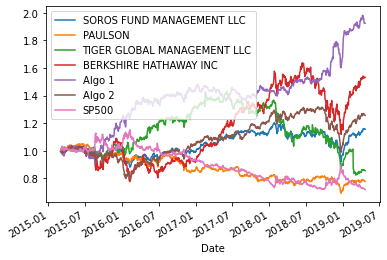

In [23]:
df_cumulative_returns = (1 + df).cumprod()
df_cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

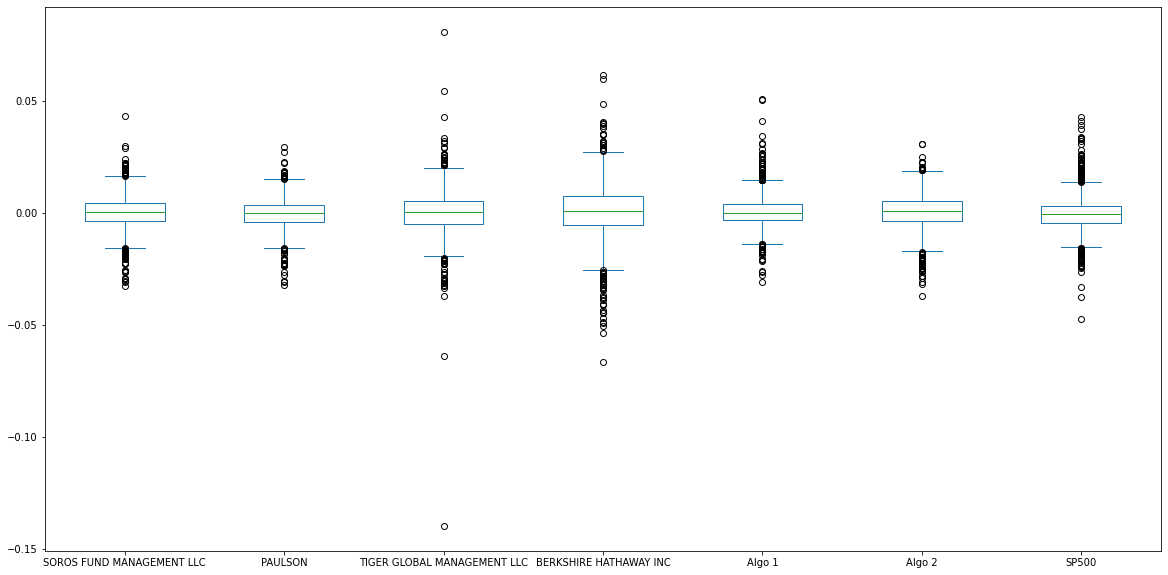

In [24]:
# Box plot to visually show risk
df.plot(kind="box", figsize=(20,10))

### Calculate Standard Deviations

In [25]:
# Calculate the daily standard deviations of all portfolios
all_stds = df.std()
all_stds

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON                        0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [55]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = df['SP500'].std()
sp500_std
#Adding previous cell to perform function below:
all_stds = df.std()
# Determine which portfolios are riskier than the S&P 500
def high_risk_portfolios(all_stds, sp500_std):
    riskier_portfolios = []
    for x in all_stds:
        if x > sp500_std:
            riskier_portfolios.append(x)
    return riskier_portfolios
high_risk_portfolios(all_stds, sp500_std)

[0.010897305414583355, 0.012918753062201797]

In [56]:
print(f"The portfolios riskier than the S&P 500 are Tiger Global, Berkshire Hathaway, Algo 1, and Algo 2. Respectively, the standard deviation of each portolio is {high_risk_portfolios(all_stds, sp500_std)}, while the S&P 500's is only {sp500_std}.")

The portfolios riskier than the S&P 500 are Tiger Global, Berkshire Hathaway, Algo 1, and Algo 2. Respectively, the standard deviation of each portolio is [0.010897305414583355, 0.012918753062201797], while the S&P 500's is only 0.00858688974707399.


### Calculate the Annualized Standard Deviation

In [27]:
# Calculate the annualized standard deviation (252 trading days)
volatility = all_stds * np.sqrt(252)
volatility

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON                        0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500                          0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

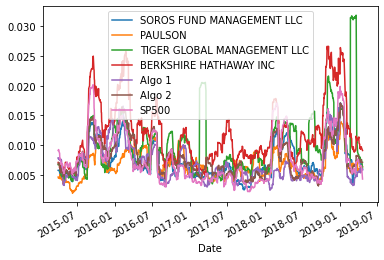

In [28]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21 = df.rolling(window=21).std().plot()
# Plot the rolling standard deviation

### Calculate and plot the correlation

<AxesSubplot:>

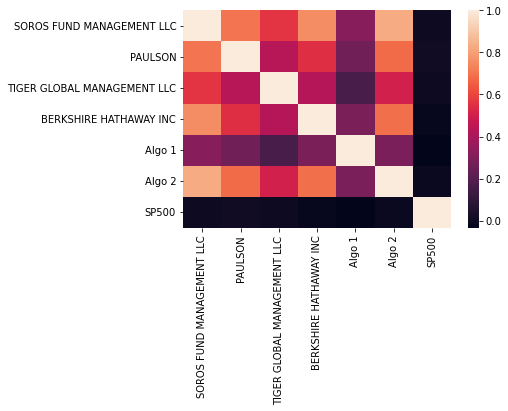

In [29]:
# Calculate the correlation
correlation = df.corr()
# Display the correlation matrix
sns.heatmap(correlation)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

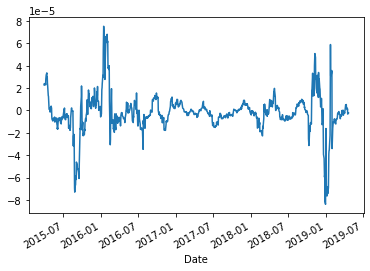

In [30]:
# Calculate covariance of a single portfolio
covariance = df['Algo 1'].cov(df['SP500'])
covariance
# Calculate variance of S&P 500
variance = df['SP500'].var()
variance
# Computing beta
algo_1_beta = covariance / variance
algo_1_beta
# Plot beta trend
rolling_covariance = df['Algo 1'].rolling(window=21).cov(df['SP500'])
rolling_covariance.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

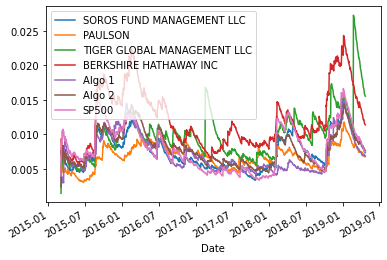

In [31]:
# Use `ewm` to calculate the rolling window
ewm = df.ewm(halflife=21).std().dropna()
ewm.plot()
#This chart looked pretty similar to the 21-rolling chart so I assumed I got it 

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [32]:
# Annualized Sharpe Ratios
sharpe_ratios = ((df.mean()-df['SP500'].mean()) * 252) / (df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.906838
PAULSON                        0.142411
TIGER GLOBAL MANAGEMENT LLC    0.278448
BERKSHIRE HATHAWAY INC         0.951436
Algo 1                         1.953767
Algo 2                         1.018189
SP500                          0.000000
dtype: float64

<AxesSubplot:>

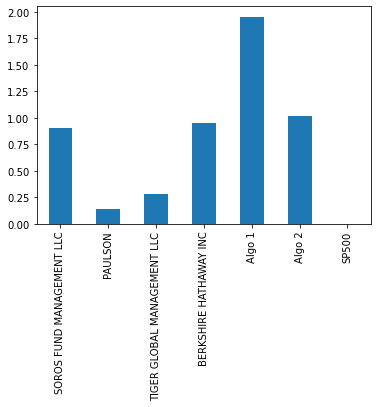

In [33]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

--- It appears that based on the sharpe ratios of each portfolio's daily returns, that the algorithmic strategies do in fact outperform both the market as well as the whales. 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [34]:
# Reading data from 1st stock, data is already sorted when imported for all csv's
tsla_data = Path("tsla_closes - Sheet1.csv")
tsla = pd.read_csv(tsla_data)
tsla.head()

,Date,Close
0,10/18/2021 16:00:00,290.04
1,10/19/2021 16:00:00,288.09
2,10/20/2021 16:00:00,288.60
3,10/21/2021 16:00:00,298.00
4,10/22/2021 16:00:00,303.23


In [35]:
# Reset Date index
# Reorganize portfolio data by having a column per symbol

tsla.set_index(pd.to_datetime(tsla['Date'], infer_datetime_format=True), inplace=True)
tsla.drop(columns=['Date'], inplace = True)
tsla.columns=['TSLA']
tsla.head()

,TSLA
Date,
2021-10-18 16:00:00,290.04
2021-10-19 16:00:00,288.09
2021-10-20 16:00:00,288.60
2021-10-21 16:00:00,298.00
2021-10-22 16:00:00,303.23


In [36]:
# Reading data from 2nd stock
nflx_data = Path("nflx_data - Sheet1.csv")
nflx = pd.read_csv(nflx_data)

In [37]:
# Reset Date index
# Reorganize portfolio data by having a column per symbol

nflx.set_index(pd.to_datetime(nflx['Date'], infer_datetime_format=True), inplace=True)
nflx.drop(columns=['Date'], inplace = True)
nflx.columns=['NFLX']
nflx.head()

,NFLX
Date,
2021-10-18 16:00:00,637.97
2021-10-19 16:00:00,639.00
2021-10-20 16:00:00,625.14
2021-10-21 16:00:00,653.16
2021-10-22 16:00:00,664.78


In [38]:
# Reading data from 3rd stock
twtr_data = Path("twtr_csv - Sheet1.csv")
twtr = pd.read_csv(twtr_data)
twtr.head()

,Date,Close
0,10/18/2021 16:00:00,64.84
1,10/19/2021 16:00:00,66.11
2,10/20/2021 16:00:00,65.80
3,10/21/2021 16:00:00,65.40
4,10/22/2021 16:00:00,62.24


In [39]:
# Reset Date index
# Reorganize portfolio data by having a column per symbol

twtr.set_index(pd.to_datetime(twtr['Date'], infer_datetime_format=True), inplace=True)
twtr.drop(columns=['Date'], inplace = True)
twtr.columns=['TWTR']
twtr.head()

,TWTR
Date,
2021-10-18 16:00:00,64.84
2021-10-19 16:00:00,66.11
2021-10-20 16:00:00,65.80
2021-10-21 16:00:00,65.40
2021-10-22 16:00:00,62.24


In [40]:
# Combine all stocks in a single DataFrame
closes_df = pd.concat([twtr, nflx, tsla], axis="columns", join="inner")
closes_df

,TWTR,NFLX,TSLA
Date,,,
2021-10-18 16:00:00,64.84,637.97,290.04
2021-10-19 16:00:00,66.11,639.00,288.09
2021-10-20 16:00:00,65.80,625.14,288.60
2021-10-21 16:00:00,65.40,653.16,298.00
2021-10-22 16:00:00,62.24,664.78,303.23
...,...,...,...
2022-10-17 16:00:00,50.74,245.10,219.35
2022-10-18 16:00:00,51.78,240.86,220.19
2022-10-19 16:00:00,51.83,272.38,222.04


In [41]:
# Calculate daily returns
daily_returns2 = closes_df.pct_change()
# Drop NAs
daily_returns2.dropna(inplace=True)
# Display sample data
daily_returns2.head()

,TWTR,NFLX,TSLA
Date,,,
2021-10-19 16:00:00,0.019587,0.001614,-0.006723
2021-10-20 16:00:00,-0.004689,-0.021690,0.001770
2021-10-21 16:00:00,-0.006079,0.044822,0.032571
2021-10-22 16:00:00,-0.048318,0.017790,0.017550
2021-10-25 16:00:00,-0.002089,0.010349,0.126604


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [42]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns2.dot(weights)
# Display sample data
portfolio_returns.head()

Date
2021-10-19 16:00:00    0.004826
2021-10-20 16:00:00   -0.008203
2021-10-21 16:00:00    0.023771
2021-10-22 16:00:00   -0.004326
2021-10-25 16:00:00    0.044955
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [43]:
# Join your returns DataFrame to the original returns DataFrame
epic_df = pd.concat([portfolio_returns, daily_returns2], axis="columns", join="inner")
epic_df.columns=["Overall", "TWTR", "NFLX", "TSLA"]
epic_df.head()

,Overall,TWTR,NFLX,TSLA
Date,,,,
2021-10-19 16:00:00,0.004826,0.019587,0.001614,-0.006723
2021-10-20 16:00:00,-0.008203,-0.004689,-0.021690,0.001770
2021-10-21 16:00:00,0.023771,-0.006079,0.044822,0.032571
2021-10-22 16:00:00,-0.004326,-0.048318,0.017790,0.017550
2021-10-25 16:00:00,0.044955,-0.002089,0.010349,0.126604


In [44]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
epic_df.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized `std`
volatility = epic_df.std() * np.sqrt(252)
volatility

Overall    0.481775
TWTR       0.573744
NFLX       0.671857
TSLA       0.661367
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

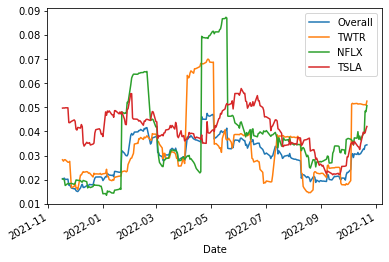

In [46]:
# Calculate rolling standard deviation
rolling_std = epic_df.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std.plot()

### Calculate and plot the correlation

<AxesSubplot:>

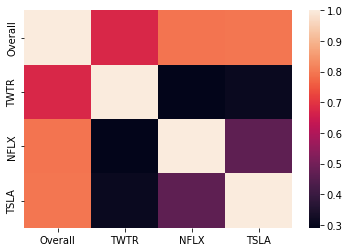

In [47]:
# Calculate and plot the correlation
correlation2 = epic_df.corr()
sns.heatmap(correlation2)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [48]:
# Calculate and plot Beta
s_and_p500_data = Path("esspee500.csv")
new_sp500 = pd.read_csv(s_and_p500_data)
new_sp500.set_index(pd.to_datetime(new_sp500['Date'], infer_datetime_format=True), inplace=True)
new_sp500.drop(columns=['Date'], inplace = True)
new_sp500.columns=['SP500']

In [49]:
sp500_returns = new_sp500.pct_change().dropna()
sp500_returns

,SP500
Date,
2021-10-19 16:00:00,0.007393
2021-10-20 16:00:00,0.003664
2021-10-21 16:00:00,0.002996
2021-10-22 16:00:00,-0.001073
2021-10-25 16:00:00,0.004748
...,...
2022-10-17 16:00:00,0.026480
2022-10-18 16:00:00,0.011428
2022-10-19 16:00:00,-0.006672


In [ ]:
# Solve for beta and plot

In [51]:
super_epic_df = pd.concat([epic_df, sp500_returns], axis="columns", join="inner")
super_epic_df


,Overall,TWTR,NFLX,TSLA,SP500
Date,,,,,
2021-10-19 16:00:00,0.004826,0.019587,0.001614,-0.006723,0.007393
2021-10-20 16:00:00,-0.008203,-0.004689,-0.021690,0.001770,0.003664
2021-10-21 16:00:00,0.023771,-0.006079,0.044822,0.032571,0.002996
2021-10-22 16:00:00,-0.004326,-0.048318,0.017790,0.017550,-0.001073
2021-10-25 16:00:00,0.044955,-0.002089,0.010349,0.126604,0.004748
...,...,...,...,...,...
2022-10-17 16:00:00,0.047151,0.005748,0.065652,0.070052,0.026480
2022-10-18 16:00:00,0.002342,0.020497,-0.017299,0.003829,0.011428
2022-10-19 16:00:00,0.046744,0.000966,0.130864,0.008402,-0.006672


In [57]:
covariance2 = super_epic_df['Overall'].cov(super_epic_df['SP500'])
variance2 = super_epic_df['SP500'].var()
beta = covariance2 / variance2
beta

1.4562449391100831

<AxesSubplot:xlabel='Date'>

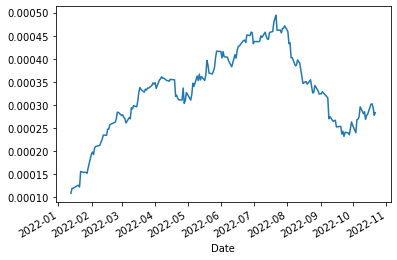

In [58]:
rolling_covariance2 = super_epic_df['Overall'].rolling(window=60).cov(super_epic_df['SP500'])
rolling_covariance2.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [53]:
sharpe = ((super_epic_df.mean()-super_epic_df['SP500'].mean()) * 252) / (super_epic_df.std() * np.sqrt(252))
sharpe

Overall   -0.181904
TWTR       0.084198
NFLX      -0.569197
TSLA       0.107656
SP500      0.000000
dtype: float64

In [ ]:
# Visualize the sharpe ratios as a bar plot


<AxesSubplot:>

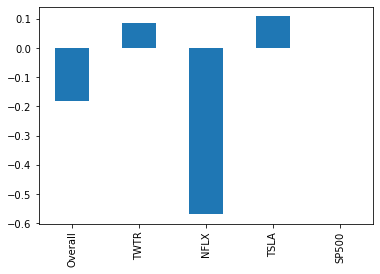

In [54]:
sharpe.plot(kind="bar")

### How does your portfolio do?

Write your answer here!

In [ ]:
# My Portfolio does not do well overall. From 10/17/2021 to 10/17/2022, my portfolio's share ratios are negative. Interestingly
# enough, I picked two out of three good stocks. However the one bad stock I did pick, out-influenced the two good stocks. 
# The lesson here could be that diversification is dangerous. That's my belief anyways. Thank you for the wonderful homework assignment.